# Goal
This post aims to introduce how to conduct dimensionality reduction with Principal Component Analysis (PCA). 

Dimensionality reduction with PCA can be used as a part of preprocessing to improve the accuracy of prediction when we have a lot of features that has correlation mutually. 

The figure below visually explains what PCA does. The **blue dots** are original data points in 2D. The **red dots** are projected data onto 1D rotating line. The **red dotted line** from blue points to red points are the trace of the projection. When the moving line overlaps with the **pink line**, the projected dot on the line is most widely distributed. If we apply PCA to this 2D data, 1D data can be obtained on this 1D line.

<center>
<figure>
  <img src="https://poissonisfish.files.wordpress.com/2017/01/q7hip.gif?w=912" alt="Visual Example of Dimensionality Reduction with PCA" style="width:70%">
  <figcaption>Fig.1 PCA to project 2D data into 1D dimension from <a href='https://www.r-bloggers.com/principal-component-analysis-in-r'>R-bloggers PCA in R</a> </figcaption>
</figure>
</center>


**Reference**

* [scikit-learn standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [R-bloggers PCA in R](https://www.r-bloggers.com/principal-component-analysis-in-r)

<!--TEASER_END-->

# Libraries

In [40]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline

# Create dataset

In [64]:
wine = load_wine()
df_wine = pd.DataFrame(wine['data'], columns=[wine['feature_names']])
print('df_wine.shape:', df_wine.shape)
df_wine.head()

df_wine.shape: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


# Apply Normalization
Typically, normalization would be applied before PCA since one of the variable with larger numbers could be dominant to explain the variance. 

In [44]:
scaler = StandardScaler()
df_wine_norm = pd.DataFrame(scaler.fit_transform(df_wine))
df_wine_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [47]:
# Mean is close to 0, and std is close to 1
df_wine_norm.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


# Apply PCA

In [63]:
pca = PCA()
df_wine_pca = pd.DataFrame(pca.fit_transform(df_wine_norm))
df_wine_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


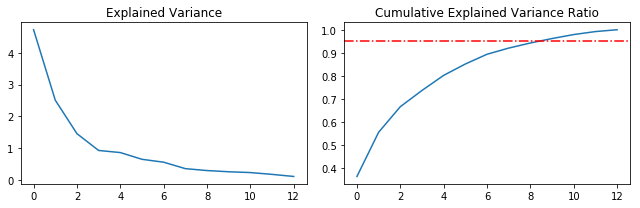

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
axes[0].plot(pca.explained_variance_);
axes[0].set_title('Explained Variance')
axes[1].plot(np.cumsum(pca.explained_variance_ratio_));
axes[1].axhline(y=0.95, c='r', ls='-.')
axes[1].set_title('Cumulative Explained Variance Ratio')
plt.tight_layout()

# Normalization & PCA together by `Pipeline`
In the below case, the number of principal component is automatically selected to 5. 

In [62]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=5))])
df_wine_pca_pipe = pd.DataFrame(pipeline.fit_transform(df_wine))
df_wine_pca_pipe.head()

,0,1,2,3,4
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
